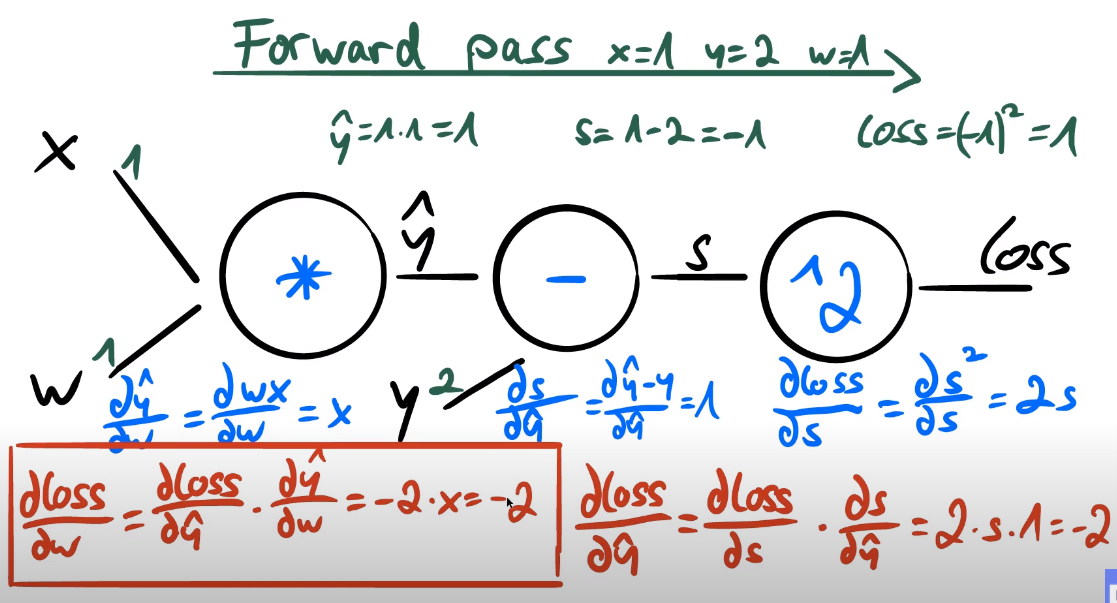

In [23]:
import torch

x = torch.tensor(1.0)
y = torch.tensor(2.0)

# This is the parameter we want to optimize -> requires_grad=True
w = torch.tensor(1.0, requires_grad=True)

# forward pass to compute loss
y_predicted = w * x
loss = (y_predicted - y)**2
print(loss)

# backward pass to compute gradient dLoss/dw
loss.backward()
print(x.grad)
print(y.grad)
print(w.grad)

# update weights
# next forward and backward pass...

# continue optimizing:
# update weights, this operation should not be part of the computational graph
with torch.no_grad():
    w -= 0.01 * w.grad
# don't forget to zero the gradients
w.grad.zero_()

# next forward and backward pass...

tensor(1., grad_fn=<PowBackward0>)
None
None
tensor(-2.)


tensor(0.)

-------------------------

In [15]:
import torch

# Here we replace the manually computed gradient with autograd

# Linear regression
# f = w * x 

# here : f = 2 * x
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model output
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

print(f'Prediction before training: f(5) = {forward(5).item():.3f}')

# Training
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
    # predict = forward pass
    y_pred = forward(X)

    # loss
    l = loss(Y, y_pred)

    # calculate gradients = backward pass
    l.backward()

    # update weights
    #w.data = w.data - learning_rate * w.grad
    with torch.no_grad():
        w -= learning_rate * w.grad
    
    # zero the gradients after updating
    w.grad.zero_()

    if epoch % 10 == 0:
        print(f'epoch {epoch+1}: w = {w.item():.3f}, loss = {l.item():.8f}')

print(f'Prediction after training: f(5) = {forward(5).item():.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


---------------------------

In [16]:
# 1) Design model (input, output, forward pass with different layers)
# 2) Construct loss and optimizer
# 3) Training loop
#       - Forward = compute prediction and loss
#       - Backward = compute gradients
#       - Update weights

import torch
import torch.nn as nn

# Linear regression
# f = w * x 

# here : f = 2 * x

# 0) Training samples
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

# 1) Design Model: Weights to optimize and forward function
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

def forward(x):
    return w * x

print(f'Prediction before training: f(5) = {forward(5).item():.3f}')

# 2) Define loss and optimizer
learning_rate = 0.01
n_iters = 100

# callable function
loss = nn.MSELoss()

optimizer = torch.optim.SGD([w], lr=learning_rate)

# 3) Training loop
for epoch in range(n_iters):
    # predict = forward pass
    y_predicted = forward(X)

    # loss
    l = loss(Y, y_predicted)

    # calculate gradients = backward pass
    l.backward()

    # update weights
    optimizer.step()

    # zero the gradients after updating
    optimizer.zero_grad()

    if epoch % 10 == 0:
        print('epoch ', epoch+1, ': w = ', w, ' loss = ', l)

print(f'Prediction after training: f(5) = {forward(5).item():.3f}')

Prediction before training: f(5) = 0.000
epoch  1 : w =  tensor(0.3000, requires_grad=True)  loss =  tensor(30., grad_fn=<MeanBackward0>)
epoch  11 : w =  tensor(1.6653, requires_grad=True)  loss =  tensor(1.1628, grad_fn=<MeanBackward0>)
epoch  21 : w =  tensor(1.9341, requires_grad=True)  loss =  tensor(0.0451, grad_fn=<MeanBackward0>)
epoch  31 : w =  tensor(1.9870, requires_grad=True)  loss =  tensor(0.0017, grad_fn=<MeanBackward0>)
epoch  41 : w =  tensor(1.9974, requires_grad=True)  loss =  tensor(6.7705e-05, grad_fn=<MeanBackward0>)
epoch  51 : w =  tensor(1.9995, requires_grad=True)  loss =  tensor(2.6244e-06, grad_fn=<MeanBackward0>)
epoch  61 : w =  tensor(1.9999, requires_grad=True)  loss =  tensor(1.0176e-07, grad_fn=<MeanBackward0>)
epoch  71 : w =  tensor(2.0000, requires_grad=True)  loss =  tensor(3.9742e-09, grad_fn=<MeanBackward0>)
epoch  81 : w =  tensor(2.0000, requires_grad=True)  loss =  tensor(1.4670e-10, grad_fn=<MeanBackward0>)
epoch  91 : w =  tensor(2.0000, re

--------------------------------

In [17]:
# 1) Design model (input, output, forward pass with different layers)
# 2) Construct loss and optimizer
# 3) Training loop
#       - Forward = compute prediction and loss
#       - Backward = compute gradients
#       - Update weights

import torch
import torch.nn as nn

# Linear regression
# f = w * x 

# here : f = 2 * x

# 0) Training samples, watch the shape!
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

n_samples, n_features = X.shape
print(f'#samples: {n_samples}, #features: {n_features}')
# 0) create a test sample
X_test = torch.tensor([5], dtype=torch.float32)

# 1) Design Model, the model has to implement the forward pass!
# Here we can use a built-in model from PyTorch
input_size = n_features
output_size = n_features

# we can call this model with samples X
model = nn.Linear(input_size, output_size)

'''
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # define diferent layers
        self.lin = nn.Linear(input_dim, output_dim)
    def forward(self, x):
        return self.lin(x)
model = LinearRegression(input_size, output_size)
'''

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

# 2) Define loss and optimizer
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Training loop
for epoch in range(n_iters):
    # predict = forward pass with our model
    y_predicted = model(X)

    # loss
    l = loss(Y, y_predicted)

    # calculate gradients = backward pass
    l.backward()

    # update weights
    optimizer.step()

    # zero the gradients after updating
    optimizer.zero_grad()

    if epoch % 10 == 0:
        [w, b] = model.parameters() # unpack parameters
        print('epoch ', epoch+1, ': w = ', w[0][0].item(), ' loss = ', l)

print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')

#samples: 4, #features: 1
Prediction before training: f(5) = 3.150
epoch  1 : w =  0.7008461952209473  loss =  tensor(12.5121, grad_fn=<MeanBackward0>)
epoch  11 : w =  1.515510082244873  loss =  tensor(0.4778, grad_fn=<MeanBackward0>)
epoch  21 : w =  1.6546865701675415  loss =  tensor(0.1575, grad_fn=<MeanBackward0>)
epoch  31 : w =  1.6849712133407593  loss =  tensor(0.1407, grad_fn=<MeanBackward0>)
epoch  41 : w =  1.697507381439209  loss =  tensor(0.1323, grad_fn=<MeanBackward0>)
epoch  51 : w =  1.7069624662399292  loss =  tensor(0.1246, grad_fn=<MeanBackward0>)
epoch  61 : w =  1.7157018184661865  loss =  tensor(0.1174, grad_fn=<MeanBackward0>)
epoch  71 : w =  1.7241132259368896  loss =  tensor(0.1105, grad_fn=<MeanBackward0>)
epoch  81 : w =  1.732264757156372  loss =  tensor(0.1041, grad_fn=<MeanBackward0>)
epoch  91 : w =  1.7401736974716187  loss =  tensor(0.0981, grad_fn=<MeanBackward0>)
Prediction after training: f(5) = 9.479
